# Recurrent neural network (RNN) 
Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [41]:
df = pd.read_csv('GOOG.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4120 non-null   object 
 1   High       4120 non-null   float64
 2   Low        4120 non-null   float64
 3   Open       4120 non-null   float64
 4   Close      4120 non-null   float64
 5   Volume     4120 non-null   float64
 6   Adj Close  4120 non-null   float64
dtypes: float64(6), object(1)
memory usage: 225.4+ KB


In [42]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2004-08-23,54.495735
1,2004-08-24,52.239197
2,2004-08-25,52.802086
3,2004-08-26,53.753517
4,2004-08-27,52.876804


In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Close
Date,
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086
2004-08-26,53.753517
2004-08-27,52.876804


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4120 entries, 2004-08-23 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4120 non-null   float64
dtypes: float64(1)
memory usage: 64.4 KB


In [49]:
# normalize
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(df[['Close']])
scaled_data

array([[0.00263049],
       [0.00136147],
       [0.00167803],
       ...,
       [0.96104425],
       [0.95024667],
       [0.95719762]])

In [53]:
scaled_data[0:10,0]

array([2.63049248e-03, 1.36147084e-03, 1.67802582e-03, 2.21308734e-03,
       1.72004565e-03, 5.60275140e-04, 6.61125309e-04, 6.72334459e-05,
       4.20206892e-04, 0.00000000e+00])

In [61]:
# create sequence
seq_len = 60
X, y = [], []

for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i, 0])
    y.append(scaled_data[i, 0])

X[:2] # each element is a vector of 60 prices of 60 days, before target day
y[:2] # each element is stock price of target day

[0.02031838499135988, 0.020307177986848193]

In [62]:
X, y = np.array(X), np.array(y)
print(f'{X.shape} {y.shape}')

(4060, 60) (4060,)


In [63]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [68]:
X.shape # shape: (samples, timesteps<60>, features<1:price>)

(4060, 60, 1)

In [70]:
# split into train and test
split = int(len(X) * 0.8) # split = (4080 * 0.8)
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

x_train.shape

(3248, 60, 1)

In [71]:
# build LSTM model
model = Sequential()

In [72]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

C:\Users\ASHWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0066
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 7.9936e-05
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 7.5862e-05
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 7.4620e-05
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6.8146e-05
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 6.5837e-05
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 6.4137e-05
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6.4609e-05
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 6.7622e-05
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 7.5235e-05


In [75]:
# predict and invert scale
predictions = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [76]:
pred_prices = sc.inverse_transform(predictions.reshape(-1, 1))
real_prices = sc.inverse_transform(y_test.reshape(-1, 1))

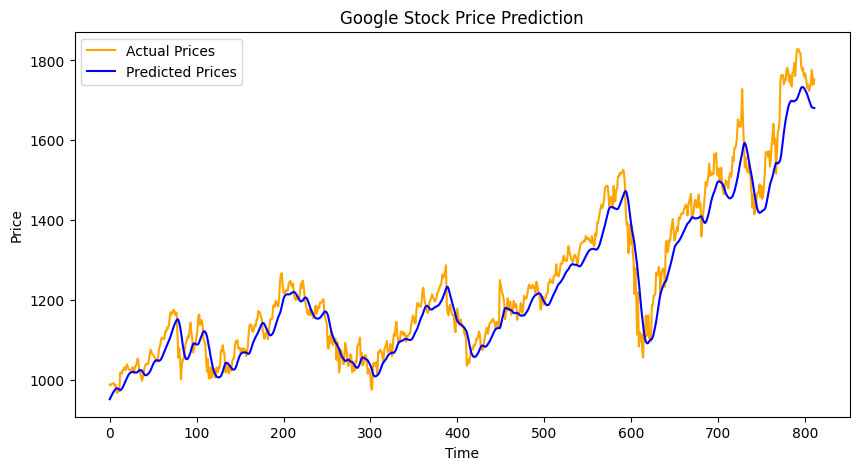

In [79]:
plt.figure(figsize=(10,5))
plt.plot(real_prices, color='orange', label='Actual Prices')
plt.plot(pred_prices, color='blue', label='Predicted Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mae = mean_absolute_error(real_prices, pred_prices)
print(f'MAE = {mae:.6f}')

MAE = 39.387273


In [85]:
mse = mean_squared_error(real_prices, pred_prices)
print(f'MSE = {mse:.6f}')

MSE = 2500.339340


In [86]:
rmse = np.sqrt(mse)
print(f'RMSE = {rmse:.6f}')

RMSE = 50.003393
